# Activity 2.1: Variational data assimilation (3D and 4D)

## 1. Introduction

In complex applications like flood or weather forecasting we use data assimilation to obtain a high-quality estimate of a state of a dynamical system, but we never know the true state exactly. Specific experiments where the `truth’ is known can be used when evaluating the performance of data assimilation schemes or exploring their sensitivities.

In the following activities, we perform synthetic experiments where we take a dynamical model and use it to generate a trajectory of a dynamical system. This trajectory is declared to be the "truth" and we will use it as an example to show how we can try to reconstruct it using data assimilation. We generate a background state and observations to use in the examples by adding noise to the "true" trajectory. This kind of setup is called an identical twin experiment.

In this activity we will use identical twin experiments to explore the differences between 3D-Var and 4D-Var methods. 

In [1]:
import numpy as np
from tools.common_misc import gen_obs, rmse_spread, createH, getBsimple
from tools.common_plots import plotRMSP

from tools.L63_model import lorenz63
from tools.L63_var import var3d, var4d
from tools.L63_plots import plotL63, plotL63obs, plotL63DA_var

## 2. The Lorenz63 model

We will use the Lorenz 63 dynamical model in this activity. It is not necessary to be familiar with the model; the important thing to note is that it is an example of a dynamical model that shows chaotic behaviour – meaning that small changes in the initial state can result in very different trajectories. The model describes the change of three variables, which we denote x, y, and z (represented in the code as `x[0]`, `x[1]` and `x[2]` respectively).

We run the model for some time (tmax = 10) and show the trajectories of each variable over time below. The trajectories of x, y, and z are also plotted together. This gives us the famous butterfly attractor, that is, the space to which the unperturbed system is typically drawn to. If the Lorenz 63 model is run using two slightly different sets of initial conditions, then after some time the two trajectories become distinct, and at a given time the two states may reside in different wings of the butterfly. For more information on the system see https://en.wikipedia.org/wiki/Lorenz_system.

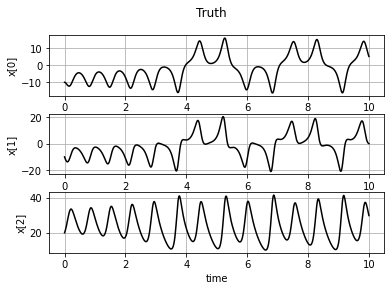

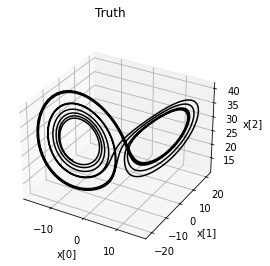

In [2]:
# The initial conditions
x0 = [-10, -10, 20]
# Compute the Lorenz model up to t=10
t, xt = lorenz63(x0, tmax=10)
plotL63(t, xt, True)

## 3. Compute the Nature Run

For the experiments we will run the system for a shorter time (tmax = 1). We will try to approximate the trajectories shown below.

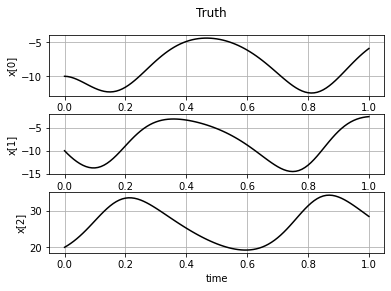

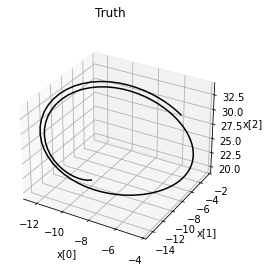

In [3]:
t, xt = lorenz63(x0, tmax=1)
plotL63(t, xt, True)

## 4. Generate some observations
We generate observations (red dots) of the model variables x, y, and z at times t=0.5 and t=1 by adding noise to the true trajectories, which we generated earlier.  A higher `var_obs` value gives larger noise and hence the uncertainty in observations is higher. Try out different values of `var_obs` and see how the distance between the observations and the truth changes. Set `var_obs=0.5` for the further steps.

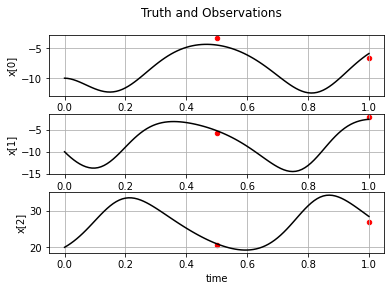

In [4]:
obsgrid = 'xyz' # This means that we will generate obs for all 3 variables
model = 'L63'
H, observed_vars = createH(obsgrid, model)

# Generating the observations
period_obs = 50
var_obs = 0.5
tobs, y, R = gen_obs(t, xt, period_obs, H, var_obs, seed=1)
plotL63obs(t, xt, tobs, y, observed_vars)

We now create a simple background error covariance matrix, which we later use for the assimilation. We omit the details of how this matrix is defined.

In [5]:
Nx = np.size(x0)
Bpre, Bcorr = getBsimple(model, Nx)
tune = 1 # depends on the observational frequency
B = tune * Bpre

## 5. Data Assimilation using 3D-Var

We will now perform data assimilation using the 3D-Var method.  We have seen earlier in the module that 3D-Var data assimilation applies to a single moment in time. Here, assimilation is performed at every observation time, that is at times t=0.5 and t=1. The background trajectories (blue) for both assimilations are generated by integrating the Lorenz 63 model starting with the imperfect estimates of the state at times t=0 and t=0.5 (this time using the updated estimate from the analysis). The analysis is shown in magenta.

t = 0.5
t = 1.0


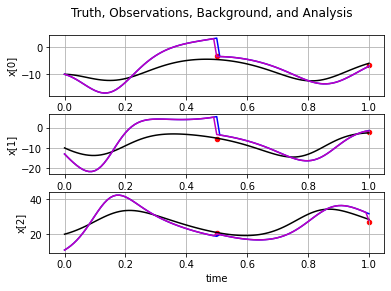

In [6]:
# A guess to start from in our assimilation experiments
# (We have a perfect model but imperfect knowledge of initial conditions and observations)
x0guess = [-11, -12, 10]
xb, xa = var3d(x0guess, t, tobs, y, H, B, R, model, Nx)
plotL63DA_var(t, xt, tobs, y, observed_vars, xb, xa)

Can you spot the difference between the analysis and the background? At what times?

The root mean square error is used to evaluate the differences between the true trajectory of the three variables and the analysis (the magenta line), and the true trajectory and the background (the blue line) at every time step. A small root mean square error shows good agreement between the compared trajectories. 

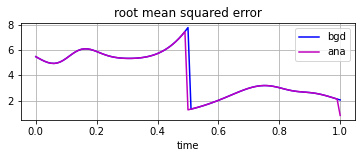

In [7]:
rmseb = rmse_spread(xt, xb, None, 1)
rmsea = rmse_spread(xt, xa, None, 1)
plotRMSP(t, rmseb, rmsea)

## 6. Data assimilation using 4D-Var

We will now perform data assimilation using the 4D-Var method. Two assimilations are performed: one for time window before t=0.5 and another after. Each analysis window includes one observation for each variable. The background is generated as in the 3D-Var experiment. 

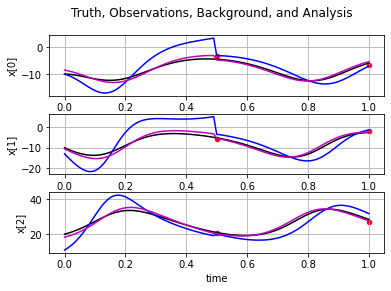

In [8]:
anawin = 1
xtol = 1e-6
xb, xa = var4d(x0guess, t, tobs, anawin, y, H, B, R, model, Nx, xtol)
plotL63DA_var(t, xt, tobs, y, observed_vars, xb, xa)

What is the difference between the analysis and the background now? Is it isolated to observation times? Why is that?

Again we calculate the root mean squared error. How does it compare between the 3D-Var and 4D-Var experiments?

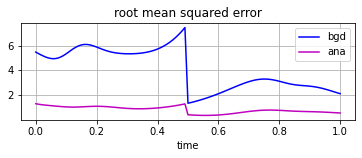

In [9]:
rmseb = rmse_spread(xt, xb, None, 1)
rmsea = rmse_spread(xt, xa, None, 1)
plotRMSP(t, rmseb, rmsea)

## 7. Conclusions

In this activity, we were introduced to and performed identical twin experiments. Assimilations using 3D-Var and 4D-Var data assimilation schemes illustrated their differences: 3D-Var performs assimilation at observation time only, hence the trajectory at previous times depends on background, whereas 4D-Var performs assimilation over a time window and the trajectory over previous times can be adjusted, which can result in improved analysis.  